In [6]:
!pip install tensorflow

# Sequential API

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import plot_model


In [31]:
# 1. Define the model
model = Sequential([
    Input(shape=[1], name="Input_Layer"),
    Dense(3, activation="relu", name="First_Layer"),
    Dense(1, activation="relu", name="Output_Layer"),
])

In [32]:
# 2. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# 3. Display model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ First_Layer (Dense)             │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

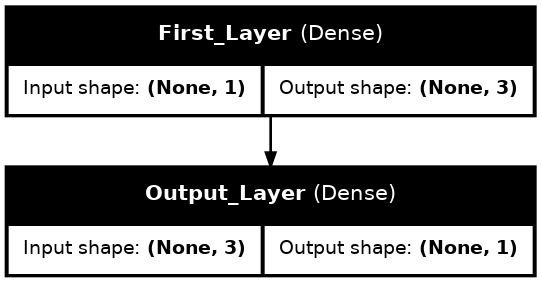

In [13]:
# 4. Plot model architecture (requires pydot and graphviz installed)
plot_model(model, show_shapes=True, show_layer_names=True, rankdir="TB", dpi=96)

# Functional API

In [14]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 1. Define the input
input_layer = Input(shape=(1,), name="Input_Layer")

In [16]:
# 2. Add hidden and output layers
first_layer = Dense(3, activation="relu", name="First_Layer")(input_layer)
output_layer = Dense(1, activation="relu", name="Output_Layer")(first_layer)

In [17]:
# 3. Create the model
model = Model(inputs=input_layer, outputs=output_layer)

In [18]:
# 4. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ First_Layer (Dense)             │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

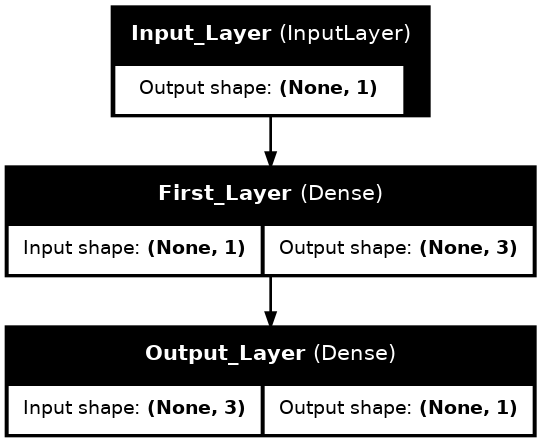

In [19]:
# 5. Summary and plot
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True, rankdir="TB", dpi=96)

# Non-sequential Neural Netowrk

In [20]:
from keras.models import Model
from keras.layers import Input, Dense, concatenate
from keras.utils import plot_model
import numpy as np

In [21]:
# 1. Input Layer
input_layer = Input(shape=(1,), name="Input_Layer")

In [22]:
# 2. Two separate branches
branch_1 = Dense(3, activation="relu", name="Branch_1")(input_layer)
branch_2 = Dense(3, activation="relu", name="Branch_2")(input_layer)

In [23]:
# 3. Merge the branches
merged = concatenate([branch_1, branch_2], name="Concatenated")

In [24]:
# 4. Output Layer
output_layer = Dense(1, activation="linear", name="Output_Layer")(merged)

In [25]:
# 5. Create Model
model = Model(inputs=input_layer, outputs=output_layer)

In [26]:
# 6. Compile
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_Layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Branch_1 (Dense)    │ (None, 3)         │          6 │ Input_Layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Branch_2 (Dense)    │ (None, 3)         │          6 │ Input_Layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Concatenated        │ (None, 6)         │          0 │ Branch_1[0][0],   │
│ (Concatenate)       │                   │            │ Branch_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 1)         │          7 │ Concatenated[0][… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

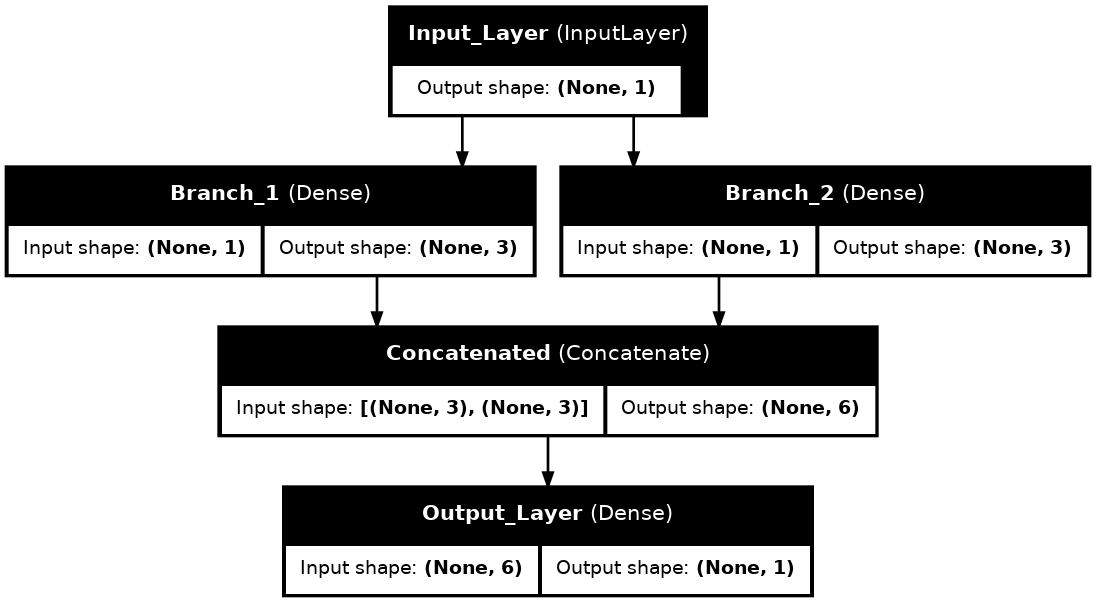

In [27]:
# 7. Summary and Visualization
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True, rankdir="TB", dpi=96)